<h1><center>Частотный анализ текста, построение облака слов</center></h1>

In [1]:
import numpy as np 
import re 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt  
from wordcloud import WordCloud 

import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
stop_words = stopwords.words("russian") 
from nltk.stem.snowball import RussianStemmer 
Stemmer_rus = RussianStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZuZu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Название файла

In [3]:
file_name = 'rus-news.txt'

### Считывание набора текстов из файла (каждый текст - в отдельной строке файла)

Файл должен находится в текущей рабочей папке

In [4]:
with open(file_name, encoding='utf-8') as file:
    texts = file.readlines()

### Просмотр 1-го текста в списке

In [5]:
texts[0]

'Даже в условиях санкций Россия смогла справиться с мировым финансовым кризисом и создать подушку безопасности для обеспечения социальных гарантий по пенсиям, заявил первый заместитель руководителя администрации президента России Сергей Кириенко, отвечая на вопрос о смысле изменения Конституции РФ. Главное, по его словам, это вопрос социальных гарантий, в частности индексация пенсии. "Никакое правительство не может сказать: знаете, у нас сейчас нет денег, ну раньше это (индексация пенсий – ред.) было, а теперь давайте это такое-то время не будет, а появятся деньги — будет опять. Вот это долгосрочная гарантия, что все обязательства будут всегда", - сказал Кириенко в интервью программе "Москва. Кремль. Путин" на канале "Россия 1". Он подчеркнул, что слова президента РФ Владимира Путина об обязательной ежегодной индексации пенсий, ещё пять лет назад не могли прозвучать. "Это то, о чем президент сказал в своем послании. Он сказал, что значимое количество времени потрачено на то, чтобы созд

## Строим облако слов без предобработки и очистки текстов

### Построение ДТМ

In [6]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в матрицу ДТ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(texts) # настройка и получение матрицы «документ-терм»

In [7]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<10x1151 sparse matrix of type '<class 'numpy.int64'>'
	with 1421 stored elements in Compressed Sparse Row format>

In [8]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

1151
['1', '10', '100', '12', '15', '17', '171', '186', '1997', '2', '20', '2003', '2012', '2013', '2017', '2018', '2019', '2020', '213', '28', '31', '35', '4', '425', '5', '50', '6', '600', '7', '7729', '9', 'aec', 'cvv', 'cygnus', 'dumas', 'environmental', 'florent', 'g', 'grumman', 'h1n1', 'h5n1', 'h7n9', 'huoxiangzhengqi', 'koufuye', 'letters', 'loubeyre', 'nature', 'ncov', 'northrop', 'occelli', 'paul', 'research', 'shuanghuanglian', 'soleil', 'sputnik', 'wu', 'zhaohua', 'а', 'автоматических', 'авторы', 'агентства', 'агентство', 'администрации', 'академии', 'активность', 'александр', 'алмазного', 'алмазной', 'алмазными', 'алмазом', 'альянс', 'альянса', 'американские', 'американскими', 'анализ', 'анализировали', 'антибактериальными', 'аппарат', 'аппарата', 'аппаратов', 'аппаратура', 'аппаратуры', 'аппараты', 'аравия', 'атипичной', 'атмосферы', 'атомной', 'багров', 'багрова', 'байкальский', 'банка', 'банки', 'банков', 'банковский', 'банком', 'банкоматами', 'баррелей', 'бдительность'

C:\Users\ZuZu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Построение "облака слов" 

In [9]:
text_join = ' '.join(texts) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

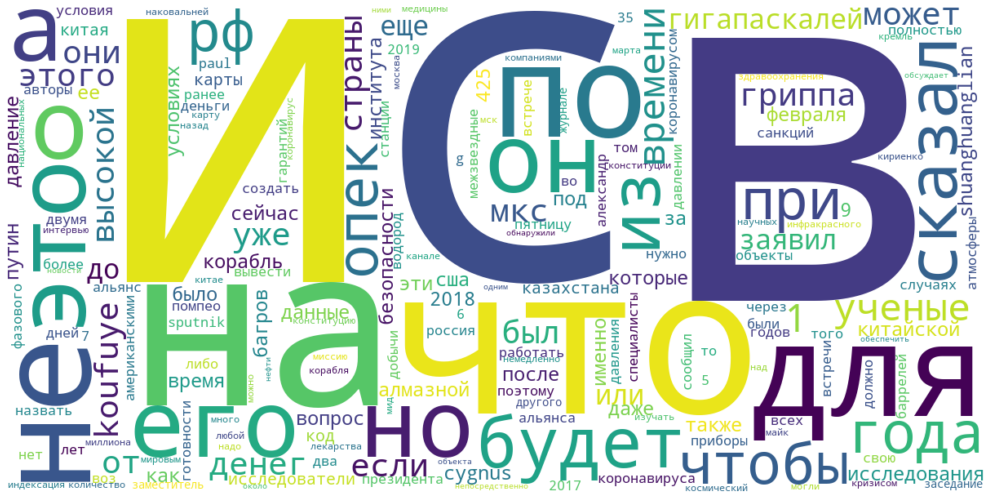

In [10]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None,
               max_words=200, min_font_size=4, stopwords=None, random_state=None,max_font_size=None,
               font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True,
               colormap=None, normalize_plurals=True, contour_width=0, contour_color='black',
               min_word_length=0, collocation_threshold=30,
               background_color="white", repeat=True, include_numbers=True, width=1200, height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

--- 

## Предобработка текстов (preprocessing)

In [11]:
corpus = map(lambda text: text.lower(), texts) # перевод текста в нижний регистр символов
corpus = map(lambda text: re.sub(r'[^а-яёa-z ]+', '', text), corpus) # оставить только руссике, английские буквы и пробелы
corpus = map(lambda text: re.sub(r' {2,}', ' ', text), corpus) # удаление лишних пробельных символов
stop_words_new = stop_words + ['это', 'ред', 'риа'] # добавляем свои стоп-слова в список
corpus = map(lambda text: text.split(), corpus) # преобразование каждого текста в список слов
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
                                       words)),
            corpus)
corpus = map(lambda text: ' '.join(text), corpus) # преобразование каждого списка слов в текст
corpus = list(corpus) # преобразование итерируемого объекта в список

### Просмотр 1-го текста в списке

In [12]:
corpus[0]

'условиях санкций россия смогла справиться мировым финансовым кризисом создать подушку безопасности обеспечения социальных гарантий пенсиям заявил первый заместитель руководителя администрации президента россии сергей кириенко отвечая вопрос смысле изменения конституции рф главное словам вопрос социальных гарантий частности индексация пенсии никакое правительство сказать знаете денег раньше индексация пенсий давайте такоето время появятся деньги долгосрочная гарантия обязательства будут сказал кириенко интервью программе москва кремль путин канале россия подчеркнул слова президента рф владимира путина обязательной ежегодной индексации пенсий ещё пять лет назад могли прозвучать президент сказал своем послании сказал значимое количество времени потрачено создать условия именно поэтому слова президента прозвучали именно поэтому могли прозвучать пять лет назад значит страна справилась мировым финансовым кризисом последствиями страны условиях санкций создала необходимые условия подушку безо

### Построение ДТМ

In [13]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»

In [14]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<10x1026 sparse matrix of type '<class 'numpy.int64'>'
	with 1136 stored elements in Compressed Sparse Row format>

In [15]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

1026
['aec', 'cvvкод', 'cygnus', 'dumas', 'environmental', 'florent', 'g', 'grumman', 'hn', 'huoxiangzhengqi', 'koufuye', 'koufuyeвласти', 'lettersкитайские', 'loubeyre', 'nature', 'ncov', 'northrop', 'occelli', 'paul', 'research', 'shuanghuanglian', 'soleil', 'sputnik', 'wu', 'zhaohua', 'автоматических', 'авторы', 'агентства', 'агентство', 'администрации', 'академии', 'активность', 'александр', 'алмазного', 'алмазной', 'алмазными', 'алмазом', 'альянс', 'альянса', 'американские', 'американскими', 'анализ', 'анализировали', 'антибактериальными', 'аппарат', 'аппарата', 'аппаратов', 'аппаратура', 'аппаратуры', 'аппараты', 'аравия', 'атипичной', 'атмосферы', 'атомной', 'багров', 'багрова', 'байкальский', 'банка', 'банки', 'банков', 'банковский', 'банком', 'банкоматами', 'баррелей', 'бдительность', 'безопасное', 'безопасности', 'белоруссию', 'беспокойство', 'беспрепятственно', 'благоприятным', 'ближайших', 'ближневосточным', 'болезни', 'бороться', 'борьбе', 'британские', 'будут', 'вакуума',

### Построение "облака слов" с предобработкой данных

In [26]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»
text_join = ' '.join(corpus) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

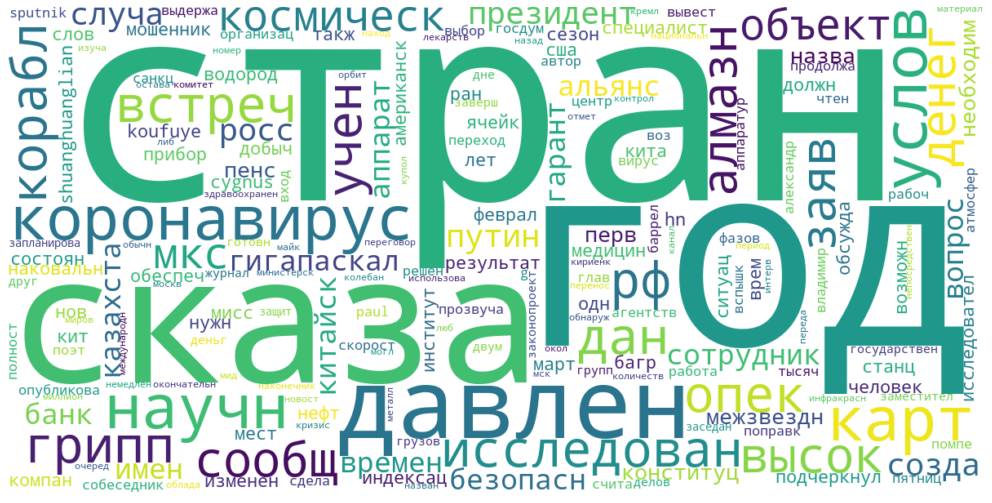

In [27]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, 
               color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None,max_font_size=None,
               font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True,
               colormap=None, normalize_plurals=True, contour_width=0, contour_color='black',
               min_word_length=0, collocation_threshold=30,
               background_color="white", repeat=True, include_numbers=True, width=1200, 
               height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

--- 

## Стемминг (преобразование слов к их основам)

In [18]:
corpus = map(lambda text: text.lower(), texts) # перевод текста в нижний регистр символов
corpus = map(lambda text: re.sub(r'[^а-яёa-z ]+', '', text), corpus) # оставить только руссике, английские буквы и пробелы
corpus = map(lambda text: re.sub(r' {2,}', ' ', text), corpus) # удаление лишних пробельных символов
stop_words_new = stop_words + ['эт', 'ред', 'риа', 'котор', 'ег'] # добавляем свои стоп-слова в список
corpus = map(lambda text: text.split(), corpus) # преобразование каждого текста в список слов
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
                                       words)),
            corpus)
corpus = map(lambda words: list(map(lambda word: Stemmer_rus.stem(word), # стемминг текста - преобразование слов в их основы
                                    words)),
            corpus)
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
                                       words)),
            corpus)
corpus = map(lambda text: ' '.join(text), corpus) # преобразование каждого списка слов в текст
corpus = list(corpus) # преобразование итерируемого объекта в список

### Просмотр 1-го текста в списке

In [19]:
texts[0] # исходный текст

'Даже в условиях санкций Россия смогла справиться с мировым финансовым кризисом и создать подушку безопасности для обеспечения социальных гарантий по пенсиям, заявил первый заместитель руководителя администрации президента России Сергей Кириенко, отвечая на вопрос о смысле изменения Конституции РФ. Главное, по его словам, это вопрос социальных гарантий, в частности индексация пенсии. "Никакое правительство не может сказать: знаете, у нас сейчас нет денег, ну раньше это (индексация пенсий – ред.) было, а теперь давайте это такое-то время не будет, а появятся деньги — будет опять. Вот это долгосрочная гарантия, что все обязательства будут всегда", - сказал Кириенко в интервью программе "Москва. Кремль. Путин" на канале "Россия 1". Он подчеркнул, что слова президента РФ Владимира Путина об обязательной ежегодной индексации пенсий, ещё пять лет назад не могли прозвучать. "Это то, о чем президент сказал в своем послании. Он сказал, что значимое количество времени потрачено на то, чтобы созд

In [20]:
corpus[0] # текст после очистки, предобработки и стемминга, вместо слов - их основы

'услов санкц росс смогл справ миров финансов кризис созда подушк безопасн обеспечен социальн гарант пенс заяв перв заместител руководител администрац президент росс серг кириенк отвеч вопрос смысл изменен конституц рф главн слов вопрос социальн гарант частност индексац пенс никак правительств сказа знает денег раньш индексац пенс дава такоет врем появ деньг долгосрочн гарант обязательств будут сказа кириенк интерв программ москв кремл путин канал росс подчеркнул слов президент рф владимир путин обязательн ежегодн индексац пенс ещ пят лет назад могл прозвуча президент сказа сво послан сказа значим количеств времен потрач созда услов имен поэт слов президент прозвуча имен поэт могл прозвуча пят лет назад знач стран справ миров финансов кризис последств стран услов санкц созда необходим услов подушк безопасн обеспеч гарант люд став риск финансовоэкономическ сист сказа президент рф владимир путин внес госдум законопроект поправк конституц госдум поддержа перв чтен поправк направл развит по

### Построение ДТМ

In [21]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»

In [22]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<10x788 sparse matrix of type '<class 'numpy.int64'>'
	with 968 stored elements in Compressed Sparse Row format>

In [23]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

788
['aec', 'cygnus', 'cввкод', 'dumas', 'environmental', 'florent', 'g', 'grumman', 'hn', 'huoxiangzhengqi', 'koufuye', 'loubeyre', 'nature', 'ncov', 'northrop', 'occelli', 'paul', 'research', 'shuanghuanglian', 'soleil', 'sputnik', 'wu', 'zhaohua', 'автоматическ', 'автор', 'агентств', 'администрац', 'академ', 'активн', 'александр', 'алмаз', 'алмазн', 'альянс', 'американск', 'анализ', 'анализирова', 'антибактериальн', 'аппарат', 'аппаратур', 'арав', 'атипичн', 'атмосфер', 'атомн', 'багр', 'багров', 'байкальск', 'банк', 'банковск', 'банкомат', 'баррел', 'бдительн', 'безопасн', 'белорусс', 'беспокойств', 'беспрепятствен', 'благоприятн', 'ближайш', 'ближневосточн', 'болезн', 'борот', 'борьб', 'британск', 'будут', 'вакуум', 'ведущ', 'вен', 'верхн', 'веществ', 'виртуальн', 'вирус', 'вирусолог', 'включ', 'владимир', 'влиян', 'вне', 'внес', 'внесен', 'вниман', 'водород', 'воз', 'возбудител', 'воздух', 'возможн', 'возникновен', 'вопрос', 'вреза', 'врем', 'времен', 'временипредыдущ', 'всемирн'

### Построение  "облака слов" после стемминга исходного текста

In [28]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»

text_join = ' '.join(corpus) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

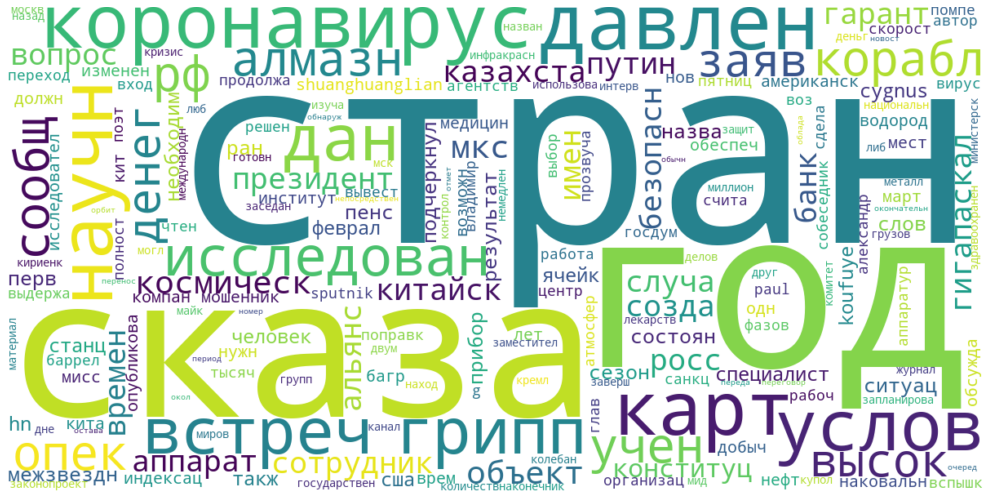

In [29]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, 
               color_func=None,max_words=200, min_font_size=4, stopwords=None, random_state=None,
               max_font_size=None,font_step=1, mode='RGB', relative_scaling='auto', regexp=None, 
               collocations=True,colormap=None, normalize_plurals=True, contour_width=0, 
               contour_color='black',min_word_length=0, collocation_threshold=30,
               background_color="white", repeat=True, include_numbers=True, width=1200, 
               height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()